In [301]:
import random
import matplotlib.pyplot as plt
import numpy as np

We create *k* actions with unit expected rewards. These expected rewards are used to create normal
 random distributions with unit variance. When an action is selected we return a reward based on the distribution for that action. 

In [302]:
k = 10
expected_rewards = np.random.normal(0, 1, size=k)

print(expected_rewards)

def action(a):
    return random.normalvariate(expected_rewards[a], 1)

[-0.49981935 -0.09119374 -0.11662465  0.30944051 -1.10313467 -0.56133409
  1.56710717  0.05866998  0.75361348 -0.55265866]


We'll now create the functionality to update value estimates. We use a sample average method where we simply average all of the rewards obtained from the selected action so far.

In [303]:
estimates = [0] * k
times_selected = [0] * k

def sample_average_estimate(a, r):
    times_selected[a] += 1
    estimates[a] = estimates[a] + (r - estimates[a]) / times_selected[a]
    

Let's try a simple greedy action selection method. 

In [304]:
def greedy_select():
    # Select the indicies of all the apparent optimal actions
    max_actions = [action for action, value in enumerate(estimates) if value == max(estimates)]
    # Return a random choice from them
    return random.choice(max_actions)

In [305]:
for t in range(1000):
    a = greedy_select()
    r = action(a)
    sample_average_estimate(a, r)

print(estimates)

[-2.1170800249129194, -0.05760853665527138, 0, -0.5690353361137042, -2.4326327092230438, -0.26877490818689764, 0, 0, 0.7871984193768548, -0.2903277257804794]


We can see that several estimates are not updating because we are not exploring at all. 

To fix this, let's try a slightly more sophisticated action selection method which randomly selects actions with some probability.

In [306]:
def epsilon_greedy_select(epsilon):
    if random.random() < epsilon:
        return random.choice(range(k))
    return greedy_select()

estimates = [0] * k
times_selected = [0] * k

for t in range(1000):
    a = epsilon_greedy_select(0.10)
    r = action(a)
    sample_average_estimate(a, r)

print(estimates)

[-0.0887668688595726, -0.3001581197117112, 0.08094582171527773, 0.24996921491849328, -1.168207461866893, -0.8507973412080646, 1.5743864683923559, 0.5183496883670987, 0.34575412323454924, -0.26724697844002504]


To compare the two methods, we can create a testbed. Here, we compare the greedy method with two epsilon methods with epsilon-values of 0.01 and 0.1. We run each method a certain number of times to a certain number of timesteps. Each run, we create a new set of actions.

In [307]:
runs = 2000
steps = 3000

rewards_greedy = []
rewards_e_greedy = []
rewards_e_greedy2 = []

for run in range(runs):
    row = []
    expected_rewards = [random.normalvariate(0, 1) for _ in range(k)]
    estimates = [0] * k
    times_selected = [0] * k
    for t in range(steps):
        a = greedy_select()
        r = action(a)
        sample_average_estimate(a, r)
        row.append(r)
    rewards_greedy.append(row)

for run in range(runs):
    row = []
    expected_rewards = [random.normalvariate(0, 1) for _ in range(k)]
    estimates = [0] * k
    times_selected = [0] * k
    for t in range(steps):
        a = epsilon_greedy_select(0.01)
        r = action(a)
        sample_average_estimate(a, r)
        row.append(r)
    rewards_e_greedy.append(row)

for run in range(runs):
    row = []
    expected_rewards = [random.normalvariate(0, 1) for _ in range(k)]
    estimates = [0] * k
    times_selected = [0] * k
    for t in range(steps):
        a = epsilon_greedy_select(0.1)
        r = action(a)
        sample_average_estimate(a, r)
        row.append(r)
    rewards_e_greedy2.append(row)

rewards_greedy_average = np.mean(rewards_greedy, axis=0)
rewards_e_greedy_average = np.mean(rewards_e_greedy, axis=0)
rewards_e_greedy2_average = np.mean(rewards_e_greedy2, axis=0)

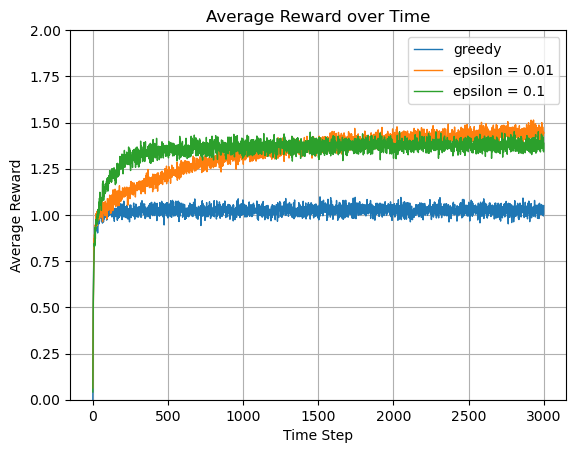

In [308]:
plt.plot(range(1, len(rewards_greedy_average) + 1), rewards_greedy_average, label="greedy", linewidth=1)
plt.plot(range(1, len(rewards_e_greedy_average) + 1), rewards_e_greedy_average, label="epsilon = 0.01", linewidth=1)
plt.plot(range(1, len(rewards_e_greedy2_average) + 1), rewards_e_greedy2_average, label="epsilon = 0.1", linewidth=1)
plt.xlabel('Time Step')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.legend()
plt.grid(True)
plt.ylim(0, 2)
plt.show()